In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mysql.connector as cnt

In [2]:
# driver data
DD1 = pd.read_csv('DriverData_1.csv', sep = '|')
DD2 = pd.read_csv('DriverData_2.csv', sep = '|')
DD3 = pd.read_csv('DriverData_3.csv', sep = '|')
DD4 = pd.read_csv('DriverData_4.csv', sep = '|')
DD5 = pd.read_csv('DriverData_5.csv', sep = '|')
DD6 = pd.read_csv('DriverData_6.csv', sep = '|')
DD7 = pd.read_csv('DriverData_7.csv', sep = '|')
DD8 = pd.read_csv('DriverData_8.csv', sep = '|')
DD9 = pd.read_csv('DriverData_9.csv', sep = '|')
DD10 = pd.read_csv('DriverData_10.csv', sep = '|')
DD11 = pd.read_csv('DriverData_11.csv', sep = '|')
DD12 = pd.read_csv('DriverData_12.csv', sep = '|')
DD13 = pd.read_csv('DriverData_13.csv', sep = '|')

**Data taken from the game Motorsport Manager with "FIRE Fantasy 22" mod - one season (2022), 13 races.**

This mod allows you to play as a manager of a various racing series, including Formula 1, which is used in this analysis. There are various drivers and teams, which also appear in real life Formula 1, however, the data that is seen here is generated by the gameplay and is not related to the performance of the real life Formula 1.

**PART ONE: DRIVERS**

Questions:

1. How did the stats of the drivers differ in the beginning and in the end of the season?
2. How did the fitness of the drivers differ in the beginning and in the end of the season?
3. How did G. Russell's stats change during the season?

**1. How did the stats of the drivers differ in the beginning and in the end of the season?**

In [3]:
#define variables
names1 = DD1['name']
totalstats1 = DD1['totalstatsmax']
names13 = DD13['name']
totalstats13 = DD13['totalstatsmax']

<function matplotlib.pyplot.show(close=None, block=None)>

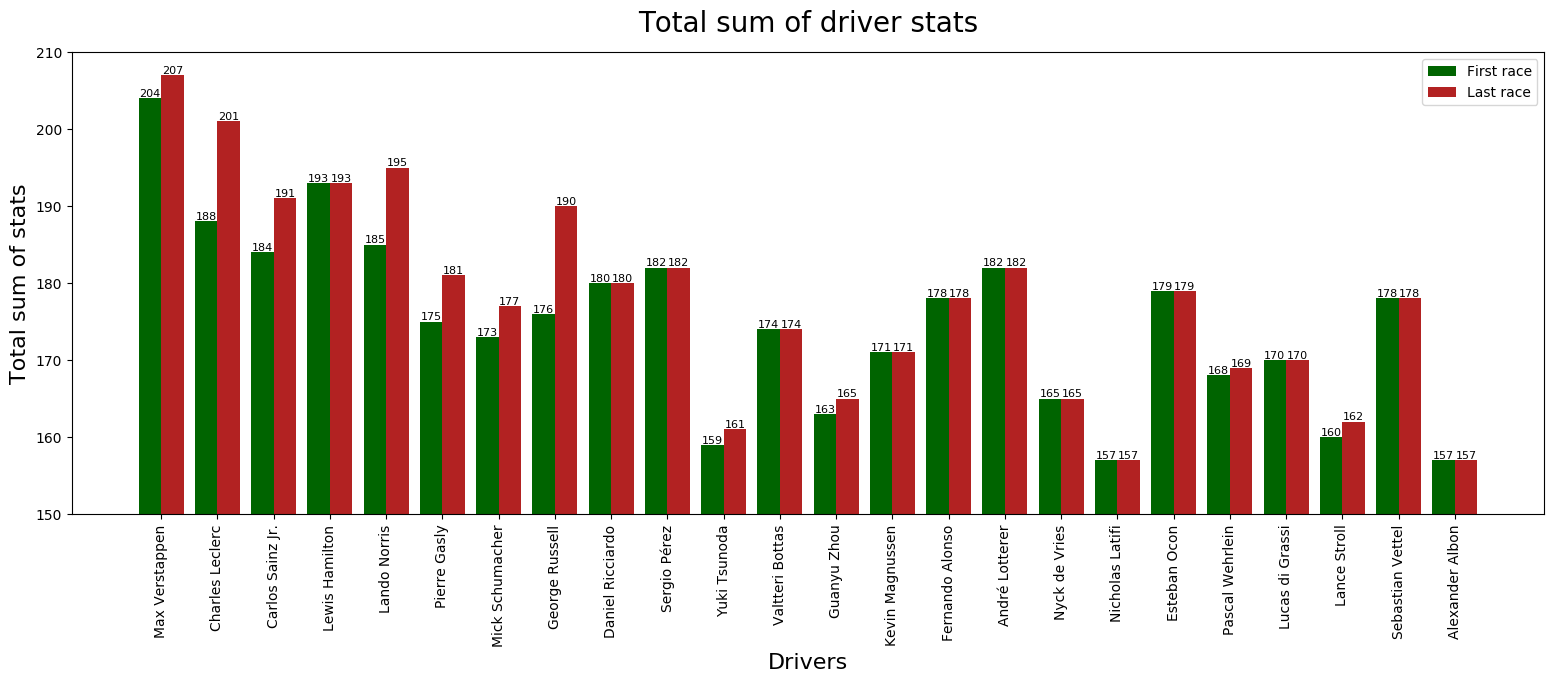

In [4]:
# graph
fig, ax = plt.subplots()

val1 = ax.bar(names1, totalstats1, color = 'DarkGreen', width= -0.4, align='edge', label = 'First race')
val13 = ax.bar(names13, totalstats13, color = 'FireBrick', width= 0.4, align='edge', label = 'Last race')

ax.bar_label(val1, fontsize = 8)
ax.bar_label(val13, fontsize = 8)

ax.set_xticks(names1)
ax.set_xticklabels(names1, rotation = 90)
fig.set_size_inches(19,6)
plt.ylim(150,210)
plt.style.use('_classic_test_patch')
ax.set_xlabel('Drivers', fontsize=16)
ax.set_ylabel('Total sum of stats', fontsize= 16)
ax.set_title('Total sum of driver stats', fontsize = 20, pad=15)
ax.legend()
plt.show

Description: While comparing first and last races of the season, the biggest total stats* difference is seen in G. Russell (14 points), second biggest stats difference - Ch. Leclerc (13 points). Most of the drivers had similar stats in the beginning and in the end of the season and there were none who had their stats drop.

*total sum of stats is defined by the sum of nine stats: braking, cornering, smoothness, overtaking, consistency, adaptability, fitness, feedback, focus.

**2. How did the fitness of the drivers differ in the beginning and in the end of the season?**

In [6]:
# define variables
fit1 = DD1['fitness']
fit13 = DD13['fitness']

<function matplotlib.pyplot.show(close=None, block=None)>

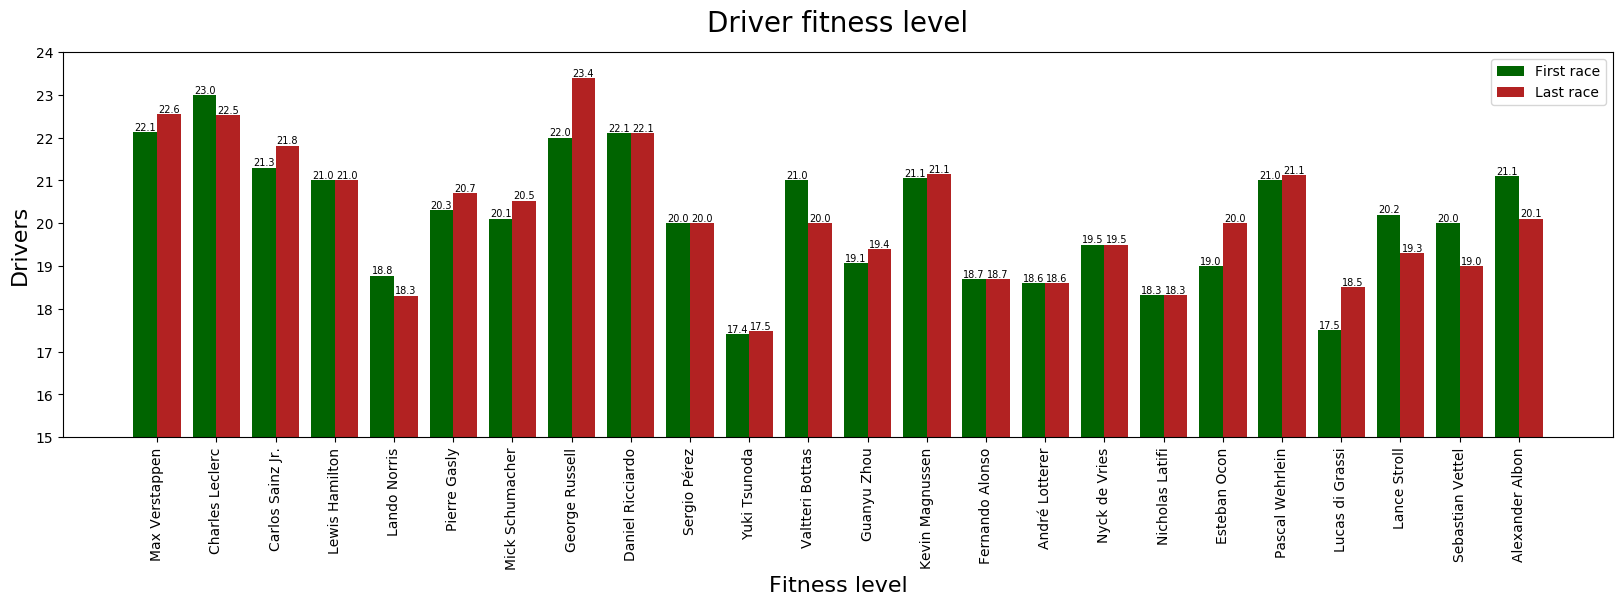

In [7]:
# graph
fig, ax = plt.subplots()

fitness1 = ax.bar(names1, fit1, color = 'DarkGreen', width= -0.4, align='edge', label = 'First race')
fitness13 = ax.bar(names13, fit13, color = 'FireBrick', width= 0.4, align='edge', label = 'Last race')
ax.bar_label(fitness1, fmt = '%.1f', fontsize = 7)
ax.bar_label(fitness13, fmt = '%.1f', fontsize = 7)

ax.set_xticks(names1)
ax.set_xticklabels(names1, rotation = 90)
fig.set_size_inches(20,5)
plt.ylim(15,24)

ax.set_ylabel('Drivers', fontsize=16)
ax.set_xlabel('Fitness level', fontsize= 16)

ax.set_title('Driver fitness level', fontsize = 20, pad= 15)
ax.legend()
plt.show

Description: the best physical improvement was shown by G. Russell (1.4 points). Some drivers had a worse fitness level at the end of the season, as compared to the start of the season: V. Bottas, S. Vettel and A. Albon (-1 point). Most of the drivers had maintained their physical form and had no or very little changes to their fitness level. 

**3. How did G. Russell's stats change during the season?**

In [8]:
# GR stats data, but for all races
GR1 = DD1[DD1.name.str.contains("George Russell")]
GR2 = DD2[DD2.name.str.contains("George Russell")]
GR3 = DD3[DD3.name.str.contains("George Russell")]
GR4 = DD4[DD4.name.str.contains("George Russell")]
GR5 = DD5[DD5.name.str.contains("George Russell")]
GR6 = DD6[DD6.name.str.contains("George Russell")]
GR7 = DD7[DD7.name.str.contains("George Russell")]
GR8 = DD8[DD8.name.str.contains("George Russell")]
GR9 = DD9[DD9.name.str.contains("George Russell")]
GR10 = DD10[DD10.name.str.contains("George Russell")]
GR11 = DD11[DD11.name.str.contains("George Russell")]
GR12 = DD12[DD12.name.str.contains("George Russell")]
GR13 = DD13[DD13.name.str.contains("George Russell")]

In [9]:
# list from data
GRMAX = [GR1['totalstatsmax'],GR2['totalstatsmax'], GR3['totalstatsmax'], GR4['totalstatsmax'], GR5['totalstatsmax'],GR6['totalstatsmax'],GR7['totalstatsmax'],GR8['totalstatsmax'], GR9['totalstatsmax'],GR10['totalstatsmax'], GR11['totalstatsmax'], GR12['totalstatsmax'], GR13['totalstatsmax']]
races = [1,2,3,4,5,6,7,8,9,10,11,12,13]

<function matplotlib.pyplot.show(close=None, block=None)>

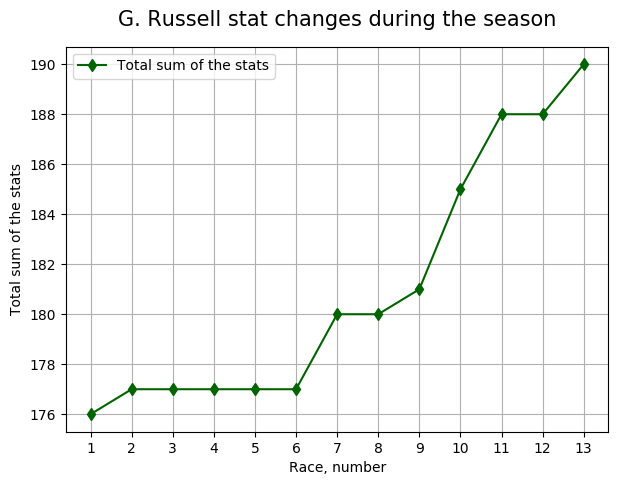

In [10]:
# graph
fig, ax = plt.subplots()

ax.plot(races, GRMAX, color='DarkGreen', label = 'Total sum of the stats', marker='d')

ax.set_xticks(races)

ax.set_xlabel('Race, number', fontsize=10)
ax.set_ylabel('Total sum of the stats', fontsize= 10)
ax.set_title('G. Russell stat changes during the season', fontsize = 15, pad=15)

ax.grid()
ax.legend()
fig.set_size_inches(7,5)
plt.show

Description: G. Russell's stats have increased throughout the season - in particular, during the second part of the season. Starting at race 7, there is a steady increase of the total stats until the end of the season. 

**PART 2: RACES**

Questions:
1. Which drivers got the most points during the season and which got the least?
2. Which teams got the most points during the season? 

In [11]:
# connect to sakila dashboard
motman = cnt.connect(
    user = 'root',
    password = ,   
    host ='localhost',
    port = 3317
)

In [12]:
C = motman.cursor()
C.execute('show databases')
ats = C.fetchall() 

In [13]:
C.execute('use motman')
C.execute('show tables')
ats = C.fetchall()

**1. Which drivers got the most and the least points during the season?**

In [14]:
# sql
sql = '''Select syd.driver, sum(syd.points+mia.points+ton.points+ct.points+van.points+gui.points+mun.points+ard.points+mil.points+sing.points+pho.points+rio.points+doh.points) as summed
from racedatasydney_1 syd
JOIN racedatamiami_2 mia ON syd.driver = mia.driver
JOIN racedatatondela_3 ton ON syd.driver = ton.driver
JOIN racedatacapetown_4 ct ON syd.driver = ct.driver
JOIN racedatavancouver_5 van ON syd.driver = van.driver
JOIN racedataguildford_6 gui ON syd.driver = gui.driver
JOIN racedatamunich_7 mun ON syd.driver = mun.driver
JOIN racedataardennes_8 ard ON syd.driver = ard.driver 
JOIN racedatamilan_9 mil ON syd.driver = mil.driver
JOIN racedatasingapore_10 sing ON syd.driver = sing.driver
JOIN racedataphoenix_11 pho ON syd.driver = pho.driver
JOIN racedatario_12 rio ON syd.driver = rio.driver
JOIN racedatadoha_13 doh ON syd.driver = doh.driver    
group by syd.driver
order by summed desc'''
# cursor
C.execute(sql)
ats1 = C.fetchall()

In [15]:
driver=[]
summed=[]
for eilute in ats1:
    summed.append(float(eilute[1]))
    driver.append(eilute[0])

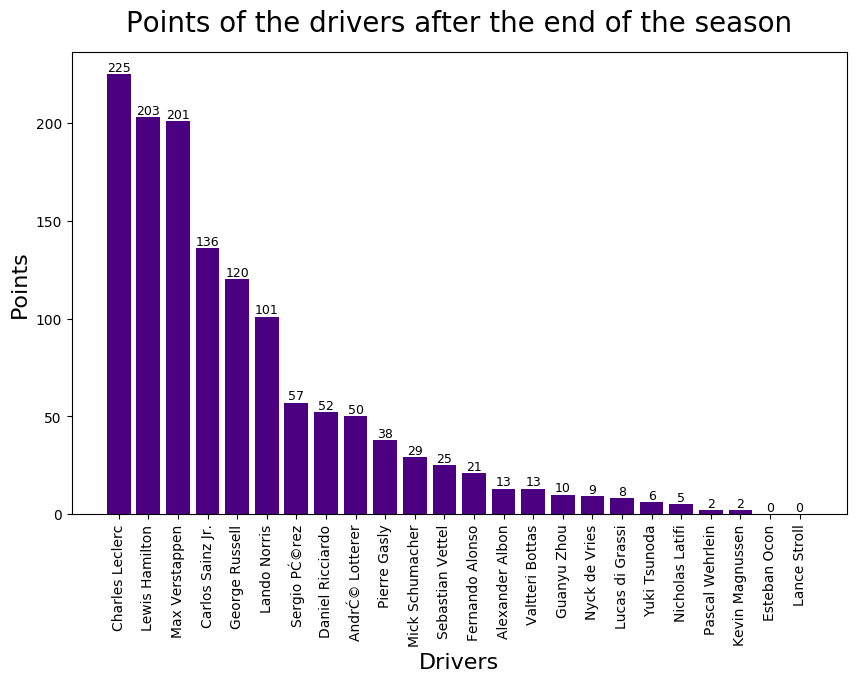

In [16]:
fig, ax = plt.subplots()

suma1 = ax.bar(driver, summed, color = 'Indigo')

ax.bar_label(suma1, fontsize=9)

ax.set_xticks(driver)
ax.set_xticklabels(driver, rotation = 90)
plt.style.use('_classic_test_patch')
ax.set_xlabel('Drivers', fontsize=16)
ax.set_ylabel('Points', fontsize= 16)
ax.set_title('Points of the drivers after the end of the season', fontsize = 20, pad=15)
fig.set_size_inches(10,6)
plt.show()

Description: most points were won by Ch. Leclerc (225 points), L. Hamilton (203 points) and M. Verstappen (201 points). Meanwhile, two drivers (E. Ocon and L. Stroll) have won zero points throughout the season.

**2. Which teams got the most points during the season?**

In [17]:
sql2 = '''Select syd.team, sum(syd.points+mia.points+ton.points+ct.points+van.points+gui.points+mun.points+ard.points+mil.points+sing.points+pho.points+rio.points+doh.points) as summed
from racedatasydney_1 syd
JOIN racedatamiami_2 mia ON syd.driver = mia.driver
JOIN racedatatondela_3 ton ON syd.driver = ton.driver
JOIN racedatacapetown_4 ct ON syd.driver = ct.driver
JOIN racedatavancouver_5 van ON syd.driver = van.driver
JOIN racedataguildford_6 gui ON syd.driver = gui.driver
JOIN racedatamunich_7 mun ON syd.driver = mun.driver
JOIN racedataardennes_8 ard ON syd.driver = ard.driver 
JOIN racedatamilan_9 mil ON syd.driver = mil.driver
JOIN racedatasingapore_10 sing ON syd.driver = sing.driver
JOIN racedataphoenix_11 pho ON syd.driver = pho.driver
JOIN racedatario_12 rio ON syd.driver = rio.driver
JOIN racedatadoha_13 doh ON syd.driver = doh.driver     
group by syd.team
order by summed desc'''
C.execute(sql2)
ats2 = C.fetchall()

In [18]:
team=[]
summed= []
for eilute in ats2:
    summed.append(float(eilute[1]))
    team.append(eilute[0])

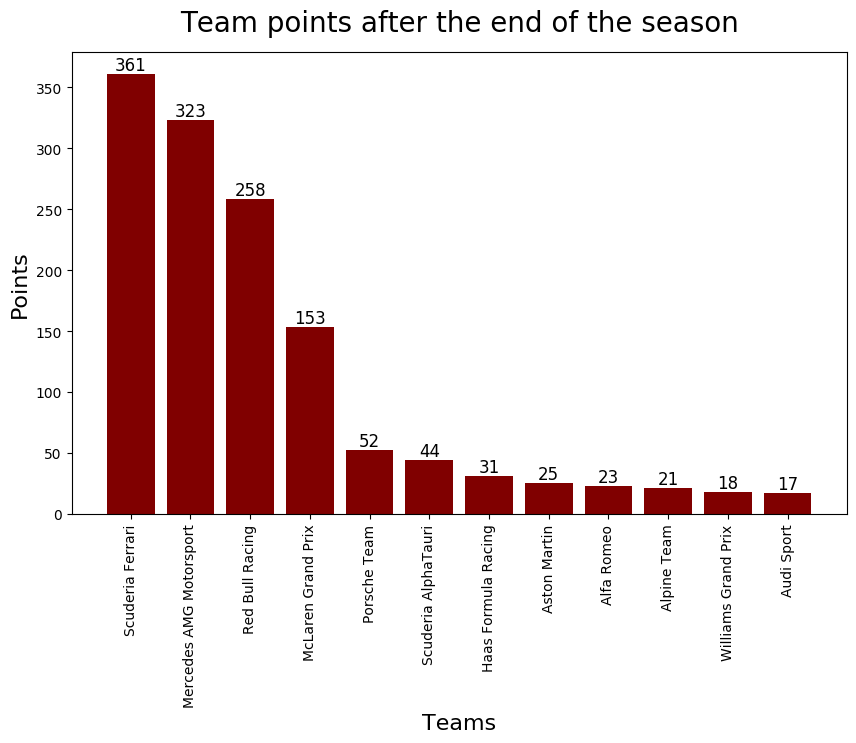

In [22]:
fig, ax = plt.subplots()

teams1 = ax.bar(team, summed, color= 'Maroon')

ax.bar_label(teams1, fontsize=12)
ax.set_xticks(team)
ax.set_xticklabels(team, rotation = 90)

ax.set_xlabel('Teams', fontsize=16)
ax.set_ylabel('Points', fontsize= 16)
ax.set_title('Team points after the end of the season', fontsize = 20, pad=15)
fig.set_size_inches(10,6)
plt.show()

Description: the most points in the season were won by Scuderia Ferrari team, Mercedes AMG Motorsport got the second place and the third place was won by Red Bull Racing.